<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/GaussianNaveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('/content/cancer.csv', delimiter= ';')
df

id  diagnose  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  F33  
0                    0.11890  NaN  
1                    0.08902  NaN  
2                    0.08758  NaN  
3                    0.17300  NaN  
4                    0.07678  NaN  
..         

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnose                 569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnose                 569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
F33                        0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnose                      0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930 

In [ ]:
# Instalações de Pacotes
!pip install dataprep

DataPrep Report
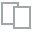
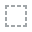
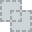
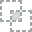
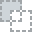
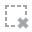
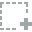
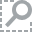
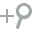
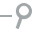
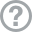
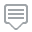
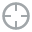
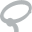
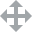
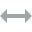
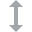
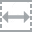
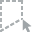
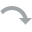
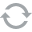
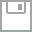
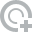
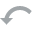
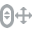
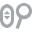
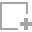
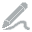
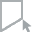
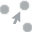
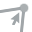
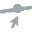

In [17]:
from dataprep.eda import create_report
create_report(df)

In [18]:
df = df.drop('id', axis= 1)
df = df.drop('F33', axis= 1)

In [19]:
df.head()

diagnose  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         1        17.99         10.38          122.80     1001.0   
1         1        20.57         17.77          132.90     1326.0   
2         1        19.69         21.25          130.00     1203.0   
3         1        11.42         20.38           77.58      386.1   
4         1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [20]:
M = df[df.diagnose == 1]
B = df[df.diagnose ==0]

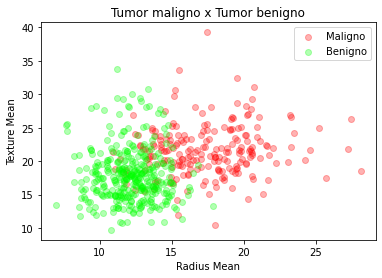

In [21]:
plt.title('Tumor maligno x Tumor benigno')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.scatter(M.radius_mean, M.texture_mean, color = 'r', label = 'Maligno', alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = 'lime', label = 'Benigno', alpha = 0.3)
plt.legend()
plt.show()


In [22]:
X = df.drop('diagnose',axis= 1)
y = df.diagnose.values

# ***Padronizando as variaveis de entrada***

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
stander = scaler.transform(X)


In [24]:
df2 = pd.DataFrame(stander)
df2

0         1         2         3         4         5         6   \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

           7         8         9   ...        20        21        22  \
0    2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601   
1    0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126   
2    2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475   
3    1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939   
4    1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539   
..        ...       ...       ...  ...       ...       ...       ...   
564  2.320965 -0.312589 -0.931027  ...  1.901185  0.117700  1.752563   
565  1.263669 -0.217664 -1.058611  ...  1.536720  2.047399  1.421940   
566  0.105777 -0.809117 -0.895587  ...  0.561361  1.374854  0.579001   
567  2.658866  2.137194  1.043695  ...  1.961239  2.237926  2.303601   
568 -1.261820 -0.820070 -0.561032  ... -1.410893  0.764190 -1.432735   

           23        24        25        26        27        28        29  
0    2.001237  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1    1.890489 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2    1.456285  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3   -0.550021  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4    1.220724  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  
..        ...       ...       ...       ...       ...       ...       ...  
564  2.015301  0.378365 -0.273318  0.664512  1.629151 -1.360158 -0.709091  
565  1.494959 -0.691230 -0.394820  0.236573  0.733827 -0.531855 -0.973978  
566  0.427906 -0.809587  0.350735  0.326767  0.414069 -1.104549 -0.318409  
567  1.653171  1.430427  3.904848  3.197605  2.289985  1.919083  2.219635  
568 -1.075813 -1.859019 -1.207552 -1.305831 -1.745063 -0.048138 -0.751207  

[569 rows x 30 columns]

# ***Criando a Maquina Preditiva***

In [29]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(stander,y, test_size= 0.3, random_state= 42)

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_treino, y_treino)

GaussianNB()

# ***Verificando a assertividade da MP***

In [34]:
print('Nave Bayes Score: ', nb.score(x_teste, y_teste) * 100)

Nave Bayes Score:  93.56725146198829
